# Práctica 4 - Aplicaciones

### Actividad 1

Ingrese las coordenadas en X:  492.4
Ingrese las coordenadas en Y:  145.5
Ingrese la velocidad de disparo:  92.8



Coordenada insertada para X:  492.4 m
Coordenada insertada para Y:  145.5 m
Velocidad insertada para el proyectil:  92.8 m/s

El ángulo de la trayectoria del primer disparo es de: 0.625494887504034 radianes, lo que equivale a 35.83821716099136 °. El disparo tiene un tiempo de vuelo de: 6.545217927706742 s.

El ángulo de la trayectoria del segundo disparo es de: 1.23261685272551 radianes, lo que equivale a 70.62374341787026 °. El disparo tiene un tiempo de vuelo de: 15.993099997633992 s.


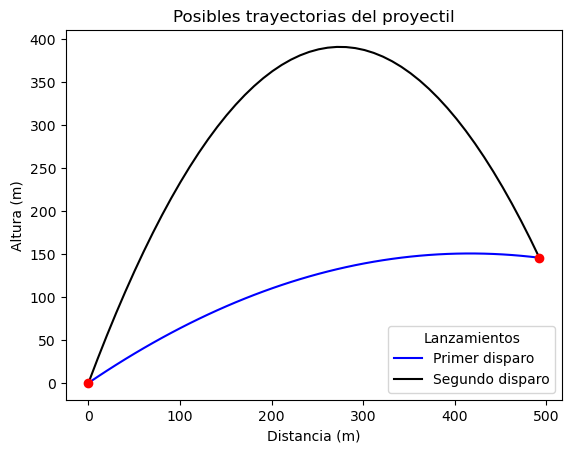

In [27]:
# Tiro al blanco

import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt

G = 9.81 # m/s^2
y0 = 0
a, t = sp.symbols("a, t")

# Función para calcular los ángulos de disparo que alcanzan (xb, yb)
def coordenadas_blanco(xb,yb,v0):
    ecuacion_yb = sp.Eq(y0+xb*sp.tan(a)-(G/2)*((xb**2)/(v0**2))*(1+sp.tan(a)**2),yb)
    resultado = sp.solve(ecuacion_yb,a)
    return resultado

# Función para calcular el tiempo de vuelo del proyectil
def tiempo_vuelo_proyectil (v0, a):
    ecuacion_xb = sp.Eq(v0*sp.cos(a)*t,xb)
    tiempo = sp.solve(ecuacion_xb)
    tiempo = float(tiempo[0])
    return tiempo

# Función para calcular las trayectorias del proyectil
def posibles_trayectorias(v0, a, tiempo0):
    tiempo0 = np.linspace(0, tiempo0)
    X = v0*sp.cos(a)*tiempo0
    Y = y0+v0*sp.sin(a)*tiempo0-g*tiempo0**2/2
    return X,Y

xb = float(input("Ingrese las coordenadas en X: "))
yb = float(input("Ingrese las coordenadas en Y: "))
v0 = float(input("Ingrese la velocidad de disparo: "))

print("\nCoordenada insertada para X: ", xb,"m") # m = metros
print("Coordenada insertada para Y: ", yb,"m") # m = metros
print("Velocidad insertada para el proyectil: ",v0,"m/s\n") # m/s = metros x segundos

# Calcular los ángulos y tiempos de vuelo para los dos posibles disparos

primer_angulo = coordenadas_blanco(xb,yb,v0)[0]
segundo_angulo = coordenadas_blanco(xb,yb,v0)[1]

primer_tiempo = tiempo_vuelo_proyectil(v0, primer_angulo)
segundo_tiempo = tiempo_vuelo_proyectil(v0, segundo_angulo)

print("El ángulo de la trayectoria del primer disparo es de:",primer_angulo,"radianes, lo que equivale a",m.degrees(primer_angulo),"°. El disparo tiene un tiempo de vuelo de:",primer_tiempo,"s.\n")
print("El ángulo de la trayectoria del segundo disparo es de:",segundo_angulo,"radianes, lo que equivale a",m.degrees(segundo_angulo),"°. El disparo tiene un tiempo de vuelo de:",segundo_tiempo,"s.")

# Calcular y graficar las trayectorias de los proyectiles

X1, Y1 = posibles_trayectorias(v0 , primer_angulo, primer_tiempo)
X2, Y2 = posibles_trayectorias(v0 , segundo_angulo, segundo_tiempo)

plt.plot(X1, Y1, "-b" , label = "Primer disparo")
plt.plot(X2, Y2, "-k" , label = "Segundo disparo")
plt.plot(0, 0, "or" ,xb ,yb ,"or") # Marcar el origen y el blanco en el gráfico
plt.legend(loc = 4, title = "Lanzamientos")
plt.title("Posibles trayectorias del proyectil")
plt.xlabel("Distancia (m)")
plt.ylabel("Altura (m)")
plt.show()

### Actividad 2.a

In [43]:
# El método de Newton

import sympy as sp
import math as m 

X = sp.symbols ("x")
ecuacion = m.e**X-5*X
derivada = sp.diff(ecuacion , X)

i = 3 # Iteraciones dadas
x = 1 # Punto inicial x = 1 dado

while i > 0 :
    i -= 1 
    x = x-ecuacion.subs(X,x)/derivada.subs(X,x)
    
print(f"El resultado mediante 3 iteraciones es de: {x}")

El resultado mediante 3 iteraciones es de: 0.259156525677152


### Actividad 2.b

In [49]:
# El método de Newton

import math as m 
import scipy.optimize as so

ecuacion = lambda X: m.e**X-5*X
resultado = so.fsolve(ecuacion, 1)[0]

print(f"Utilizando la función scipy.optimize.fsolve el resultado es {resultado}")

Utilizando la función scipy.optimize.fsolve el resultado es 0.2591711018190737


### Actividad 3

In [51]:
# Concentración de un contaminante:

import math as m
import scipy.optimize as so

V = 1e6
Q = 1e5
W = 1e6
K = 0.25

ecuacion = lambda c: (W-Q*c-K*V*m.sqrt(c))/V

resultado = so.fsolve(ecuacion, 4)[0] # c = 4 (valor inicial dado)

print(f"La concentración en el estado estacionario es de: {resultado}")

La concentración en el estado estacionario es de: 4.624080932040303


### Actividad 4

In [69]:
# Sistemas lineales

import numpy as np

matriz = np.array([[-2,1,0,0],[1,-2,1,0],[0,1,-2,1],[0,0,1,-2]])
eq =  np.array([[1],[2],[-7],[-1]])

resultado = np.linalg.solve(matriz, eq)

print(f"La solucion del sistema lineal es:\n\n{resultado}")

La solucion del sistema lineal es:

[[1.]
 [3.]
 [7.]
 [4.]]


### Actividad 5

In [77]:
# Leyes de Kirchoff

import numpy as np

#a)

print("Sistema de ecuaciones lineales:\n") # Obtenido de archivo de circuitSystem
print(" (R1 + R2)i1 - (R2)i2 + (0)i3 = V1" )
print("-(R2)i1 + (R2 + R3 + R4)i2 - (R4)i3 = 0 ")
print(" (0)i1 - (R4)i2 + (R4 + R5)i3 = -V2 ")

#b)

R1 = R2 = R3 = R4 = R5 = 1 
V1 = 5
V2 = -6

sistema = np.array ([[R1+R2,-R2,0],[-R2,R2+R3+R4,-R4],[0,-R4,R4+R5]])
igualacion = np.array ([[V1],[0],[-V2]])

resultado = np.linalg.solve(sistema , igualacion)

print("\nLa solucion para el sistema de ecuaciones lineales es:\n\n", resultado)

Sistema de ecuaciones lineales:

 (R1 + R2)i1 - (R2)i2 + (0)i3 = V1
-(R2)i1 + (R2 + R3 + R4)i2 - (R4)i3 = 0 
 (0)i1 - (R4)i2 + (R4 + R5)i3 = -V2 

La solucion para el sistema de ecuaciones lineales es:

 [[3.875]
 [2.75 ]
 [4.375]]


### Actividad 6

In [79]:
# Método del trapecio

import numpy as np

a = 0 # Límite inferior
b = 2 # Límite superior
segmentos = 10

h = (b-a)/segmentos # Tamaño de paso
x = np.zeros(segmentos)
x[0] = a

ecuacion = lambda x: (x**2/2)

for i in range(10):
    if i == 0:
        pass
    else:
        x[i] = a+i*h
        
funcion = ecuacion(x)

formula = (h/2)*(ecuacion(a)+ecuacion(b)+2*sum(funcion))

print(f"El resultado de aproximar la integral definida usando el método del trapecio con h = {h} es {formula}")

El resultado de aproximar la integral definida usando el método del trapecio con h = 0.2 es 1.3400000000000003


### Actividad 7

In [83]:
# Contador de vehículos

import scipy.integrate as sc

#a)

vehiculos = [18, 23, 14, 24, 20, 9] # Cantidad de vehículos cada 15 min. desde 7:30 hasta 9:15

h = 15/4 # Tamaño de paso

formula = (h/2)*(2*sum(vehiculos)-vehiculos[-1]-vehiculos[0])

print(f"a) El resultado obtenido utilizando el método del trapecio es: {formula}")

#b)

funcion = sc.trapz(vehiculos, dx = h)

print(f"b) El resultado obtenido utilizando scipy.integrate.trapz es: {funcion}")

a) El resultado obtenido utilizando el método del trapecio es: 354.375
b) El resultado obtenido utilizando scipy.integrate.trapz es: 354.375


### Actividad 8

In [85]:
# El Método de Euler

a = 0
b = 1
pasos = 4
y0 = 1
phi = [] # Pendiente en cada punto

x = np.linspace(a,b,pasos+1)
h = x[1]-x[0]

primera_derivada_y = lambda x1,y1: 1-y1+x1

for i in x:
    y0 = y0+h*primera_derivada_y(i, y0)
    phi.append(y0)

print(f"Las solución aproximada es: {phi}")

Las solución aproximada es: [1.0, 1.0625, 1.171875, 1.31640625, 1.4873046875]


### Actividad 9

[0.2, -0.0]
[0.2, -9.579784051201411e-06]
[0.19999999995322515, -9.579784051201411e-06]
[0.1999999999064503, -1.9159568097912758e-05]
[0.19999999985967543, -1.915956809567229e-05]
[0.1999898206326153, -0.006320097805184679]
[0.1999898206348737, -0.00631993842773317]
[0.1999594070455959, -0.012620393987169756]
[0.19995940756473327, -0.012620075248660066]
[0.19990876244788316, -0.018919248728048555]
[0.1999087639947631, -0.018918930026378053]
[0.19966924517400111, -0.03601119934356192]
[0.19966926513677752, -0.036010221286868524]
[0.19928081050654498, -0.0530733664262668]
[0.1992808549123158, -0.053074350427180825]
[0.19874375746035836, -0.0700987285431189]
[0.19874380319873447, -0.07009873653167197]
[0.19805847987899164, -0.08707061799404624]
[0.19805852624483408, -0.08707063117688787]
[0.19579072783827015, -0.12783308321112263]
[0.1957911026638025, -0.12783323749121134]
[0.19638535046219133, -0.1185518798895453]
[0.19638553358111366, -0.11855195155253018]
[0.19420286730948322, -0.14972

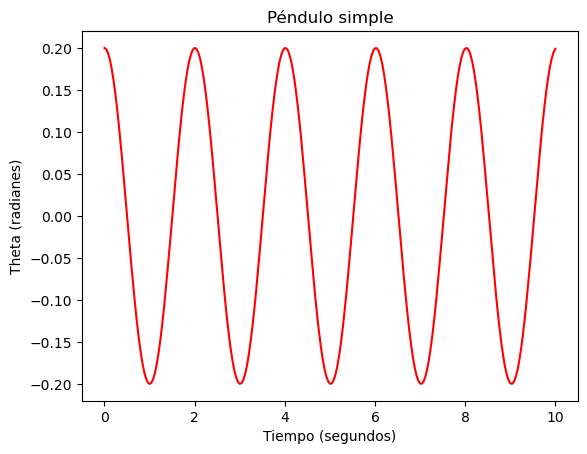

In [89]:
# Péndulo simple

import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.integrate as sc

G = 9.81 # m/s^2
longitud = 1
theta = [0,0.2]
T = np.arange(0,10.01,0.04)

def pendulo(theta,T,G,longitud):
    cresta = theta[1]
    valle = -(G/longitud)*np.sin(theta[0])
    onda = [cresta,valle]
    print(onda)
    return onda

resultado = sc.odeint(pendulo,theta,T,args = (G,longitud))

plt.plot (T, resultado[:, 1], "-r")
plt.title("Péndulo simple")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Theta (radianes)")
plt.show()

### Actividad 10

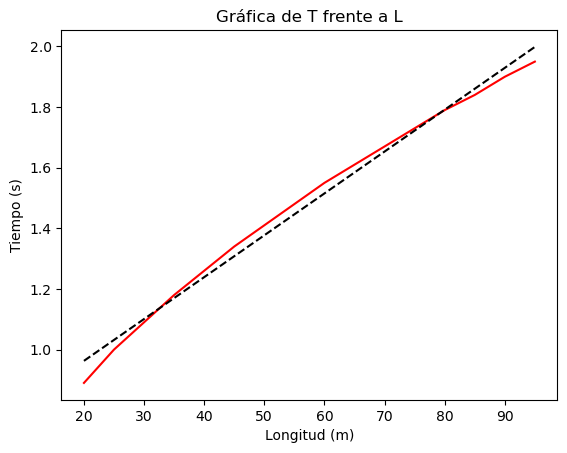

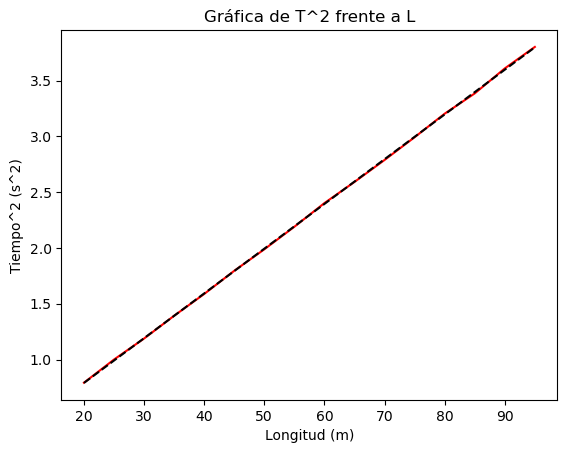

El valor de la gravedad es aproximadamente: 9.904285133667273


In [95]:
# Regresión lineal

import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
import statistics as st 

l = np.arange(20,100,5).reshape((-1 , 1))
T = np.array([0.89,1.00,1.09,1.18,1.26,1.34,1.41,1.48,1.55,1.61,1.67,1.73,1.79,1.84,1.90,1.95])

#a)

plt.plot(l,T,"-r")
grafico = skl.LinearRegression().fit(l,T)
r = grafico.score(l,T)
b = grafico.intercept_
mod = grafico.coef_
T1 = grafico.predict(l)
plt.plot(l,T1,"--k")
plt.title("Gráfica de T frente a L")
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()

plt.plot(l,T**2,"-r")
grafico = skl.LinearRegression().fit(l,T**2)
r = grafico.score(l,T**2)
b = grafico.intercept_
mod = grafico.coef_
T2 = grafico.predict(l)
plt.plot(l,T2,"--k")
plt.title("Gráfica de T^2 frente a L")
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo^2 (s^2)")
plt.show()

ecuacion = np.zeros(len(l))
for i in range(len(l)):
    ecuacion[i] = (4 * l[i] * m.pi**2) / (T[i]**2)

#b)

G = st.median(ecuacion)/100 # Gravedad

print(f"El valor de la gravedad (G) es aproximadamente: {G}")